<a href="https://colab.research.google.com/github/KatherineMungayi/Compiler_construction_groupwork/blob/main/CompilerConstructionLabs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**GROUP MEMBERS(ICS 4C):**

121800

121195

119988

121199

#LAB 1 (9TH SEPTEMBER 2022)

**Instructions**
Give a brief description of the following tools:
Flex, Bison, Lex, Yacc

The description should have: 3-5 lines definition, diagram and code snippet

Submit a text file having the link to your Github repo having the colab/jupyter nb file.

**FLEX**

* Flex is a lexical analyzer generator that takes input specification
and generates a combined NFA to recognize all your patterns, converts it to an equivalent DFA, minimizes the automaton as much as possible, and generates C code that will implement it.

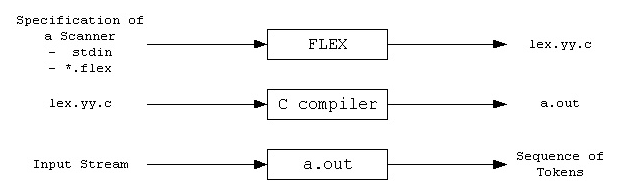


* FLEX reads a specification of a scanner either from an input file *.lex, or from standard input, and it generates as output a C source file lex.yy.c. Then, lex.yy.c is compiled and linked with the "-lfl" library to produce an executable a.out. Finally, a.out analyzes its input stream and transforms it into a sequence of tokens.


In [ ]:
#This code prints 'compiler construction'

In [ ]:

%{

#undef yywrap
#define yywrap() 1

%}

%%

[\n] {
	printf("Compiler construction\n");	
}

	
%%

main()
{
	yylex(); //calling the rules section
}

**BISON**

Bison is a general purpose parser generator that converts a grammar description for an LALR (Look Ahead Left Right) context free grammar into a C program that parsers that grammar. It is used in conjuction with Flex to create programs that are able to process input strings. Parsers generated with Bison take in a sequence of tokens from the lexical analyzer (generated with Flex), and recognizes it's structure in the form of a parse tree. The parse tree represents a mapping of grammar symbols to data elements.

### 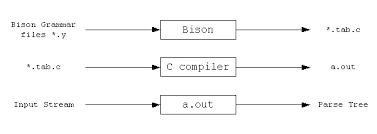

The code snippet below is defines a grammar for handling input in a calculator.

**Code Example**

In [ ]:
%{
#define YYSTYPE double
#include <math.h>
%}

/* BISON Declarations */
%token NUM
%left '-' '+'
%left '*' '/'
%left NEG     /* negation--unary minus */
%right '^'    /* exponentiation        */

/* Grammar follows */
%%
input:    /* empty string */
        | input line
;

line:     '\n'
        | exp '\n'  { printf ("\t%.10g\n", $1); }
;

exp:      NUM                { $$ = $1;         }
        | exp '+' exp        { $$ = $1 + $3;    }
        | exp '-' exp        { $$ = $1 - $3;    }
        | exp '*' exp        { $$ = $1 * $3;    }
        | exp '/' exp        { $$ = $1 / $3;    }
        | '-' exp  %prec NEG { $$ = -$2;        }
        | exp '^' exp        { $$ = pow ($1, $3); }
        | '(' exp ')'        { $$ = $2;         }
;
%%

**LEX**

Lex(Lexical Analyzer Generator) is a program used to generate scanners. These scanners are also known as tokenizers, and are used to recognize lexical patterns in text.
It takes as its input a LEX source program and produces lexical Analyzer as its output. Lexical Analyzer will convert the input string entered by the user into tokens as its output.


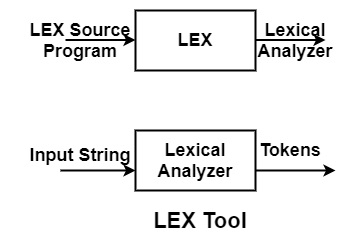

> Indented block

Lex can perform simple transformations by itself but its main purpose is to facilitate lexical analysis, the processing of character sequences such as source code to produce symbol sequences called tokens for use as input to other programs such as parsers. 
Lex can be used with a parser generator to perform lexical analysis. It is easy, for example, to interface Lex and Yacc, an open source program that generates code for the parser in the C programming language.

The structure of a lex program
A LEX program consists of three sections : Declarations, Rules and Auxiliary functions

DECLARATIONS

%%

RULES

%%

AUXILIARY FUNCTIONS

**Code Example**

In [ ]:
%option noyywrap
%{
	#include <stdlib.h>
	#include <stdio.h>
%}
	
number [0-9]+
 
%%
 
{number} {printf("Found : %d\n",atoi(yytext));}
 
%%
 
int main()
{
	yylex();
	return 1;
}

**YACC**

YACC (Yet another compiler compiler) is a tool that acts as a syntax analyzer or parser generator.It is designed to compile a LALR(1),(look ahead,left-to-right) grammar .This means it is used to produce the source code of the syntactic analyzer of the language produced by LALR (1) grammar. YACC was originally designed to be compelemnted by Lex.

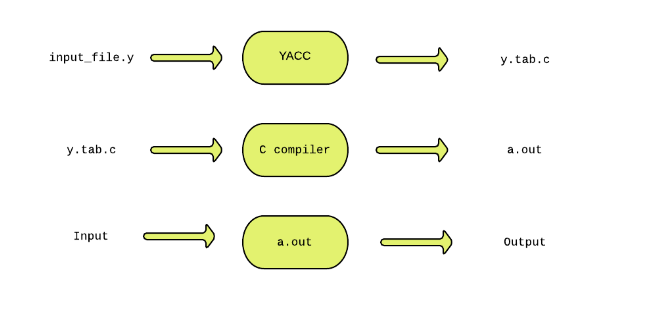


YACC TOOL


The diagram above demonstrates how the YACC tool works.
An input file with the desired grammar in YACC format is fed to the compiler to create a source program (y.tab.c)
The source program is compiled to produce an executable file which will then parse grammar given in the input_file.y

**Code example**


The input of yacc is divided into three sections

... definitions ...

%%

...rules... (This is where the grammar is placed)

%%

...subroutines...

In [ ]:
#Addition and subtraction arithmetic operation example with YACC

%{
  # include <stdio.h>

%}
%union {
    double real;
    int integer;
}
%token <real> REAL 
%token <integer> INTEGER
%token PLUS MINUS
%type <real> rexpr
%type <integer> ixexpr
%left PLUS MINUS 




#LAB 2 (12TH SEPTEMBER 2022)

a. Using any TWO examples, show the conversion of NFA to DFA
[For assistance, I have attached two files on E-Learning to act as a guide. You are also 
free to use any other conversion methods that you prefer]
For submission, you can draw the necessary diagrams by hand or using a computer tool, 
then attach a screenshot to your lab activity running file.


b. Using the material on E-Learning, show how to use Flex and Bison when building a 
simple lexical analyzer

**NFA TO DFA CONVERSION**

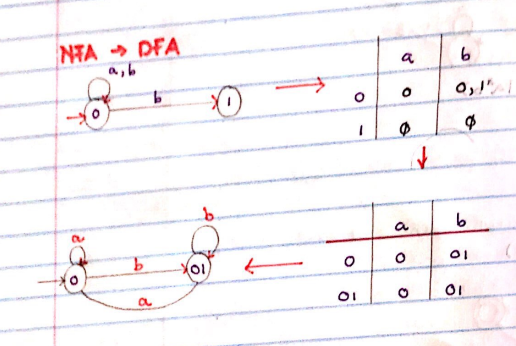

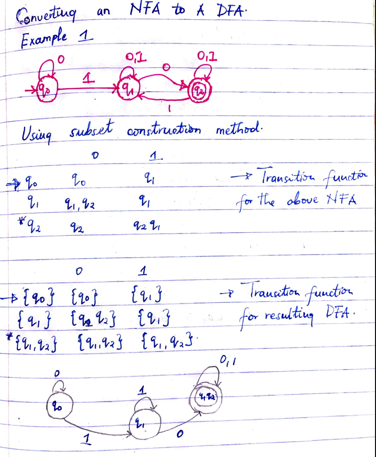

**FLEX AND BISON FOR BUILDING A SIMPLE LEXICAL ANALYSER**

Flex and bison usually go hand in hand when creating lexical analyzers.This is because in most cases a scanner is written using flex then a parser is written using Bison and both of them get combined to come up with a lexical analyzer.
There are three main steps involved in building a lexical analyser using flex;

**Step 1**: A file ,written in lex language is fed into a flex compiler.This file contains information about the lexical analyser which needs to be generated and has the extension '.l ' .The diagram below shows an example snippet of a file written in lex language to generate a lexical analyser which helps to identify capital and and small letters.

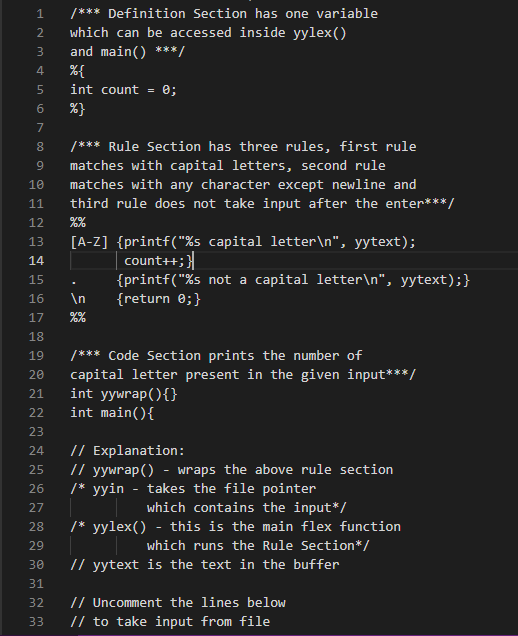


The parsing functions such as yyerror,yyparse() etc are written in Bison.The flex compiler transforms the flex file to a C program in a file always identified as lex.yy.c.As seen in the snippet above,the file has sections for rules,definitions and user defined sub routines.






**Step 2**: The C compiler compiles the lex.yy.c file into an executable file named a.out .The image below shows the command for this to take place.

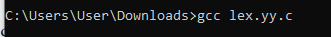

**Step 3** : The output file (executable file) accepts a stream of input characters and produces a stream of tokens.The image below shows this action;

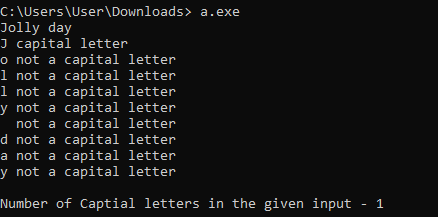

The a. out file gives output according to what was described in the original lex file.In this case,it shows the capital and non-capital letters after analyzing the input sentences and words.

A simple calculator using flex

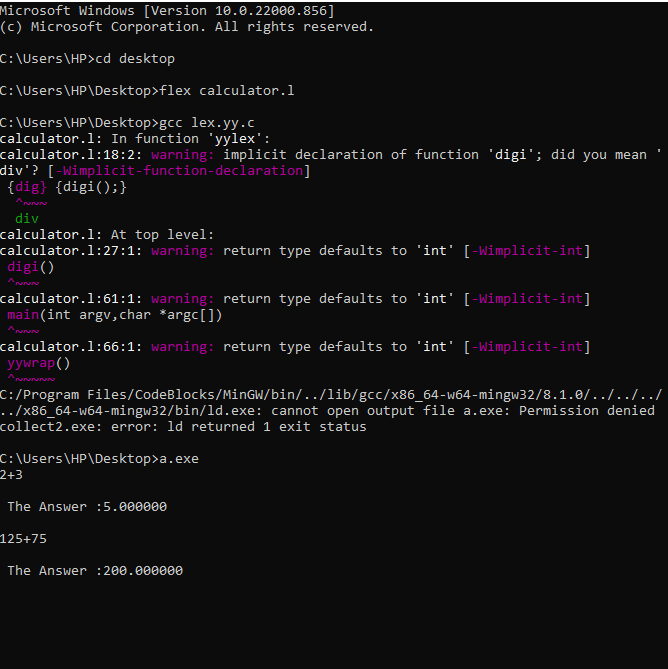

Steps to use Bison(With a different program):

 Write a lexical analyzer to process input and pass tokens to the parser.

 Write the grammar specification for bison, including grammar rules, yyparse() and yyerror().

 Run Bison on the grammar to produce the parser.

 Compile the code output by Bison, as well as any other source files.

 Link the object files to produce the finished product.


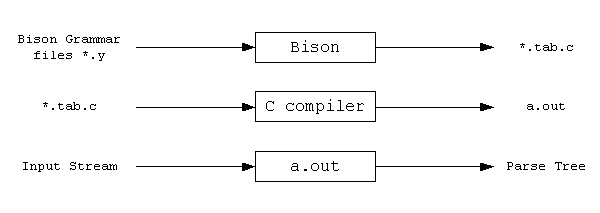

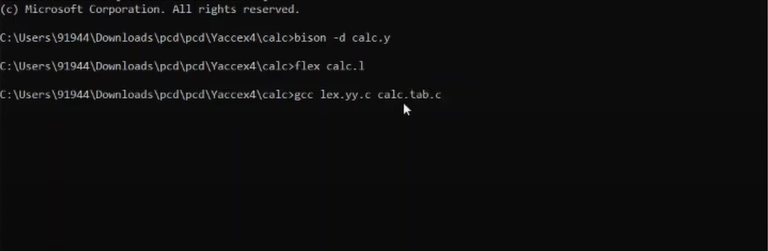

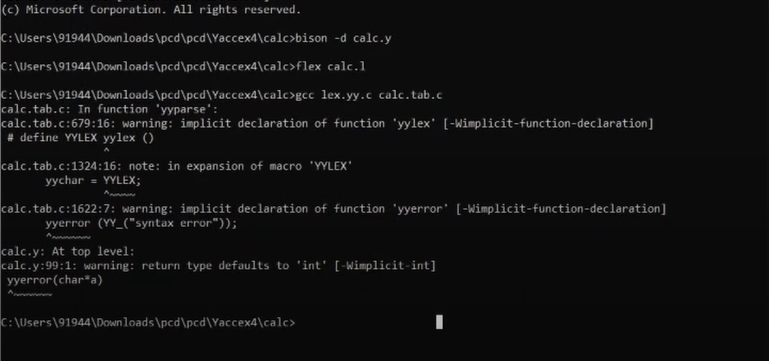

#LAB 3 (19TH SEPTEMBER 2022)

Develop a simple lexer by developing your own Flex input file;

Identify if a number is even/odd.

**Code snippet**

In [ ]:
/*** Definition Section has one variable
which can be accessed inside yylex()
and main() ***/

%{
#include<stdio.h>
int i;
%}

/*** Rule Section***/

%%

[0-9]+	 {i=atoi(yytext);
		if(i%2==0)
			printf("Even number");
		else
		printf("Odd number");}
%%


/*** Driving Code Section which  shows if  the number provided in the input is even or odd***/

int yywrap(){}

int main()
{

	yylex();
	return 0;
}


**Steps in running the file**

1.Generating the lex.yy.c file by executing the flex command.

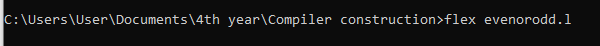

2.Compiling the lex.yy.c file generated using gcc


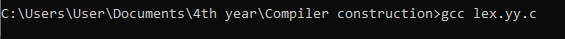

3.Running the executable a.out to provide input and get the necessary output.

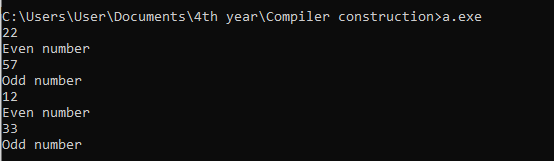

# LAB 4 (10TH OCTOBER)

Instructions (questions)

1. Using an example or illustration, explain what is predictive parsing?
2. As an extension to question 1, 
a. What is LL (1) parsing?
b. Why do we get the First () and Follow () i.e. what do these two functions Really 
Represent?
3. Are there any unique attributes associated with Top-Down parsing?


**1. Predictive Parsing**

This is a special form of recursive descent parsing, where no backtracking is required, so this can predict which products to use to replace the input string.

Non-recursive predictive parsing or table-driven is also known as LL(1) parser which follows the leftmost derivation (LMD). 

LL(1):
here, first L is for Left to Right scanning of inputs,
 the second L is for left most derivation procedure,
  1 = Number of Look Ahead Symbols 

The goal of predictive parsing is to construct a top-down parser that never backtracks. To do so, we must transform a grammar in two ways:

1. eliminate left recursion, and
2. perform left factoring.

These rules eliminate most common causes for backtracking although they do not guarantee a completely backtrack-free parsing (called LL(1).

The main problem during predictive parsing is that of determining the production to be applied for a non-terminal. 
This non-recursive parser looks up which product to be applied in a parsing table. A LL(1) parser has the following components: 

(1) buffer: an input buffer which contains the string to be passed 
(2) stack: a pushdown stack which contains a sequence of grammar symbols 
(3) A parsing table: a 2d array M[A, a] 
    where
    A->non-terminal, a->terminal or $
(4) output stream:
 end of the stack and an end of the input symbols are both denoted with $ 

With the help of First() and Follow() parsing can be done using a stack that avoids the recursive calls.

Considering the subsequent LL(1) grammar:
S -> A
S -> ( S * A )
A -> id
and parsing the given input:
( id * id )

The parsing table:
- row -> for each and every non-terminal symbol,
- column -> for each and eery terminal (including the special terminal).

Each cell of this table will contain at most one rule of the given grammar: 


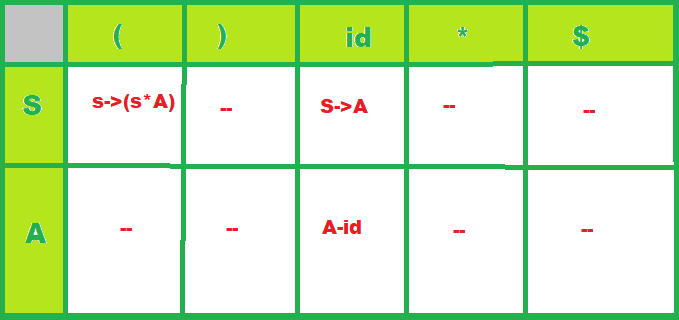

The procedure via the parser

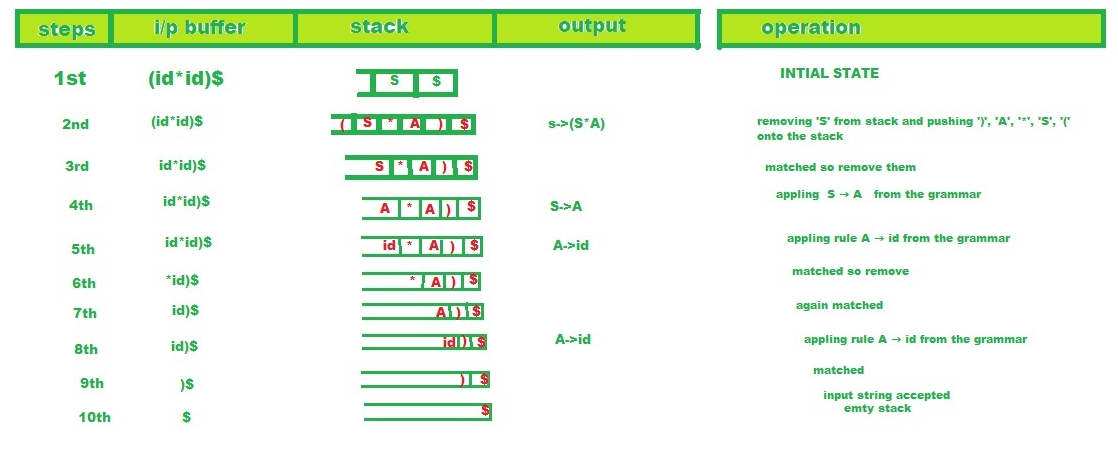


The parser thus ends because there remains only ‘$’ on both its stack and its input stream. In this case, the parser reports that it has accepted the input string and writes the following list of rules to the output stream: 

S -> ( S * A), 
S -> A, 
A -> id, 
A -> id 

This is indeed a list of rules for an LMD of the input string, which is: 

S -> ( S * A ) -> ( A * A ) -> ( id * A ) -> ( id * id )  



**2 a) LL (1) parsing**


The procedure via 

In [ ]:
// pseudo-code for top-down LL(1) parsing (assume "lookahead" keeps getting updated with the latest lookahead value)
S.push(startsym);
while(!S.empty())
{
  X = S.pop();
  if (X == lookahead) consumeToken();
  else if (isToken(X)) error("Expected token " + X + " but got " + lookahead);
  else
  {
    rule = chooseRule(X,lookahead);
    pushReverseRightHandSide(S,rule);
  }
}
if (lookahead != $)
  error("Error! Unread input remaining.");
return SUCCESS;


**b) Why do we get the First () and Follow () i.e. what do these two functions Really Represent**

We need to find FIRST and FOLLOW sets for a given grammar so that the parser can properly apply the needed rule at the correct position.

1. **WHY FIRST()**

Taking a grammar from the previous article:
S -> cAd
A -> bc|a 
And the input string is “cad”. 

In the example above, if it knew that after reading character ‘c’ in the input string and applying S->cAd, next character in the input string is ‘a’, then it would have ignored the production rule A->bc (because ‘b’ is the first character of the string produced by this production rule, not ‘a’ ), and directly use the production rule A->a (because ‘a’ is the first character of the string produced by this production rule, and is same as the current character of the input string which is also ‘a’).

It is validated that if the compiler/parser knows about first character of the string that can be obtained by applying a production rule, then it can wisely apply the correct production rule to get the correct syntax tree for the given input string.

2. **WHY FOLLOW()**

Considering the following grammar
A -> aBb
B -> c | ε
And suppose the input string is “ab” to parse. 

As the first character in the input is a, the parser applies the rule A->aBb.

          A
        / |  \
      a   B   b
The parser checks for the second character of the input string which is b, and the Non-Terminal to derive is B, but the parser can’t get any string derivable from B that contains b as first character.

The Grammar does contain a production rule B -> ε, if that is applied then B will vanish, and the parser gets the input “ab”, as shown below. But the parser can apply it only when it knows that the character that follows B in the production rule is same as the current character in the input.

In RHS of A -> aBb, b follows Non-Terminal B, i.e. FOLLOW(B) = {b}, and the current input character read is also b. Hence the parser applies this rule. And it is able to get the string “ab” from the given grammar.

           A                    A
        /  |  \              /    \                                                
      a    B    b    =>     a      b       
           |
           ε 

So FOLLOW can make a Non-terminal vanish out if needed to generate the string from the parse tree. 

**3.unique attributes associated with Top-Down parsing**



Top down parsing can be describes as a parsing technique which starts at the root of the parse tree and grows towards its leaves.Two unique attributes associated with Top down parsing are;

**a)Synthesized Attributes**

This is an attribute of the non terminal which is on the left hand side of the production .They represent information which is being passed up the parse tree.Assuming the following production;

S->ABC 

If S is taking values from its child nodes(A,B and C) then it is said to be a synthesized attribute.The values of A,B and C are sythesized to S.

Another example for the synthesized attribute.

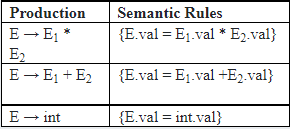




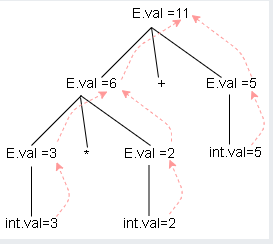



From the parse tree above ,it is shown that 'E' can inherit the values from its childen which in this case are E1 and E2.In Sythesized attributes,only parents can inherit values from their children.

**b)Inherited Attributes**

This is an attribute of the non terminal which is on the right hand side of the production rule.The attribute can take value either from its parent or siblings which means variables which are either on its right or left hand sides.For example ;

S -> ABC

'C' can get its values from from eithwe 'S', 'A' or 'B'.



Another example for inherited attributes;

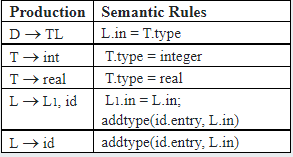



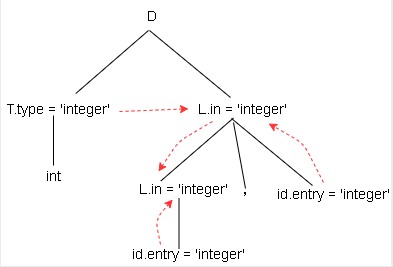



##REFERENCES


https://www.geeksforgeeks.org/why-first-and-follow-in-compiler-design/

https://www.geeksforgeeks.org/algorithm-for-non-recursive-predictive-parsing/#:~:text=Predictive%20parsing%20is%20a%20special,the%20leftmost%20derivation%20(LMD).

https://pediaa.com/what-is-the-difference-between-recursive-descent-parsing-and-predictive-parsing/

Bison code retrieved from http://web.mit.edu/gnu/doc/html/bison_5.html

https://silcnitc.github.io/lex.html

Wilhelm, R., Seidl, H., & Hack, S. (2013). Compiler Design. In Syntactic and Semantic Analysis.